In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as datareader
from datetime import date


In [4]:
start='2010-01-01'
end=date.today()
data=datareader.DataReader('AAPL','yahoo',start,end)
data1=datareader.DataReader('AMZN','yahoo',start,end)
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444380
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544686
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556002
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451721
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793


In [5]:
data=data.reset_index()
data1=data1.reset_index()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3099 entries, 0 to 3098
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3099 non-null   datetime64[ns]
 1   High       3099 non-null   float64       
 2   Low        3099 non-null   float64       
 3   Open       3099 non-null   float64       
 4   Close      3099 non-null   float64       
 5   Volume     3099 non-null   float64       
 6   Adj Close  3099 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 169.6 KB


In [7]:
data['Date'] = pd.to_datetime(data['Date'], format = '%Y%m%d')
data1['Date'] = pd.to_datetime(data1['Date'], format = '%Y%m%d')

In [8]:
data['day'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year

data1['day'] = data1['Date'].dt.day
data1['month'] = data1['Date'].dt.month
data1['year'] = data1['Date'].dt.year

In [9]:
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close,day,month,year
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444380,31,12,2009
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544686,4,1,2010
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556002,5,1,2010
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451721,6,1,2010
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793,7,1,2010


In [10]:
data['ma100'] = data.Close.rolling(100).mean()
data.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,day,month,year,ma100
3094,2022-04-18,166.600006,163.570007,163.919998,165.070007,69023900.0,165.070007,18,4,2022,169.2604
3095,2022-04-19,167.820007,163.910004,165.020004,167.399994,67723800.0,167.399994,19,4,2022,169.3203
3096,2022-04-20,168.880005,166.100006,168.759995,167.229996,67929800.0,167.229996,20,4,2022,169.3732
3097,2022-04-21,171.529999,165.910004,168.910004,166.419998,87227800.0,166.419998,21,4,2022,169.4693
3098,2022-04-22,167.869995,161.500000,166.460007,161.789993,84775200.0,161.789993,22,4,2022,169.4848


In [11]:
data['ma200'] = data.Close.rolling(200).mean()
data.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,day,month,year,ma100,ma200
3094,2022-04-18,166.600006,163.570007,163.919998,165.070007,69023900.0,165.070007,18,4,2022,169.2604,158.50775
3095,2022-04-19,167.820007,163.910004,165.020004,167.399994,67723800.0,167.399994,19,4,2022,169.3203,158.64495
3096,2022-04-20,168.880005,166.100006,168.759995,167.229996,67929800.0,167.229996,20,4,2022,169.3732,158.77100
3097,2022-04-21,171.529999,165.910004,168.910004,166.419998,87227800.0,166.419998,21,4,2022,169.4693,158.88025
3098,2022-04-22,167.869995,161.500000,166.460007,161.789993,84775200.0,161.789993,22,4,2022,169.4848,158.97300


In [12]:
data1['ma200'] = data1.Close.rolling(200).mean()
data1['ma100'] = data1.Close.rolling(200).mean()

In [13]:
data1=data1.dropna()

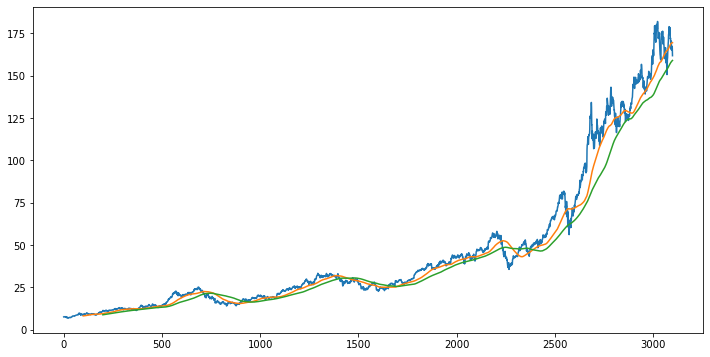

In [14]:
plt.figure(figsize= (12,6))
plt.plot(data.Close)
plt.plot(data['ma100'])
plt.plot(data['ma200'])

In [15]:
data=data.dropna()

In [16]:
X=data[['day','month','year','ma100','ma200']]

In [17]:
y=data['Close']

In [18]:
X.shape

(2900, 5)

In [19]:
X=X.dropna()

In [20]:
X.shape

(2900, 5)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [22]:
print(X_train.shape)
y_train.shape

(2030, 5)


(2030,)

In [23]:
from sklearn.linear_model import LinearRegression
Model = LinearRegression().fit(X_train,y_train)

In [24]:
Model.score(X_test,y_test)

0.9869752625846218

In [25]:
print(Model.predict(X))
output = pd.DataFrame(Model.predict(X))
y

[  9.53048284   9.53580581   9.54927775 ... 179.12344183 179.20890807
 179.18959962]


199      11.240714
200      11.357143
201      11.053214
202      11.090357
203      11.054286
           ...    
3094    165.070007
3095    167.399994
3096    167.229996
3097    166.419998
3098    161.789993
Name: Close, Length: 2900, dtype: float64

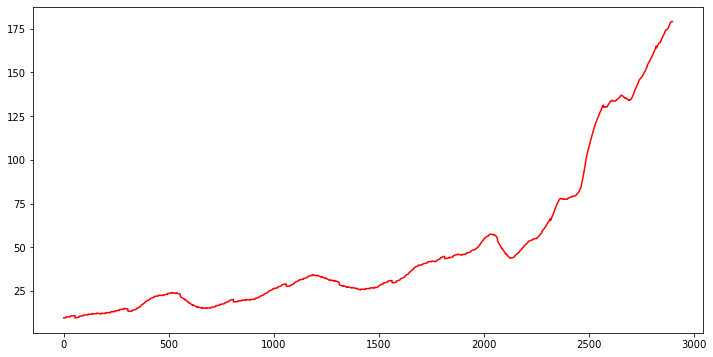

In [26]:
plt.figure(figsize= (12,6))
plt.plot(output,'r',label= 'Predicted Price')


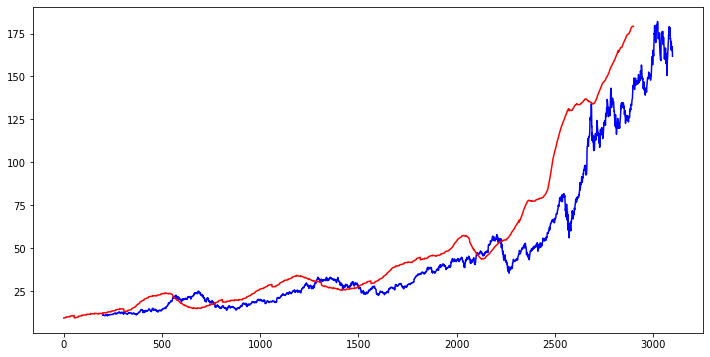

In [304]:
plt.figure(figsize= (12,6))
plt.plot(y, 'b' ,label= 'Original Price')
plt.plot(output,'r',label= 'Predicted Price')

In [305]:
data1=data1.dropna()

In [306]:
output = pd.DataFrame(Model.predict(data1[['day','month','year','ma100','ma200']]))
print(output)
print(data1.head())

                0
0      132.788159
1      132.912266
2      133.030678
3      133.145057
4      133.304059
...           ...
2895  3385.458846
2896  3383.670624
2897  3380.620757
2898  3376.882247
2899  3372.562975

[2900 rows x 1 columns]
          Date        High         Low        Open       Close    Volume  \
199 2010-10-15  164.880005  156.750000  158.419998  164.639999  10135500   
200 2010-10-18  165.190002  161.820007  165.000000  163.559998   6331300   
201 2010-10-19  162.800003  157.000000  160.679993  158.669998   7525000   
202 2010-10-20  159.869995  156.570007  158.779999  158.669998   5790400   
203 2010-10-21  166.130005  161.289993  162.669998  164.970001  13482500   

      Adj Close  day  month  year      ma200      ma100  
199  164.639999   15     10  2010  130.35480  130.35480  
200  163.559998   18     10  2010  130.50000  130.50000  
201  158.669998   19     10  2010  130.62385  130.62385  
202  158.669998   20     10  2010  130.74375  130.74375  
203  164.970

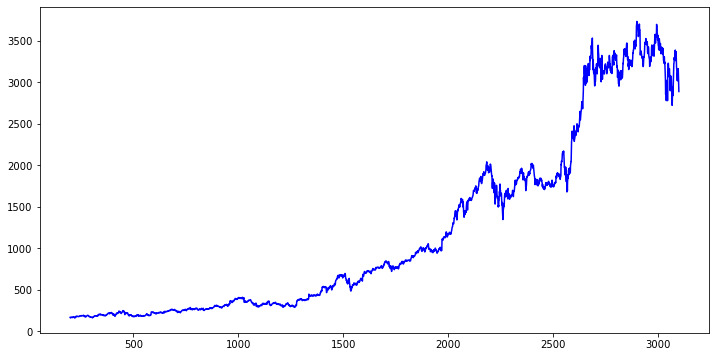

In [307]:
plt.figure(figsize= (12,6))
plt.plot(data1.Close, 'b' ,label= 'Original Price')

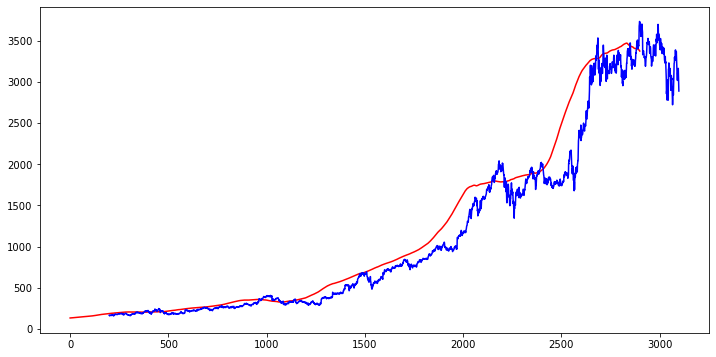

In [308]:
plt.figure(figsize= (12,6))
plt.plot(output, 'r' ,label= 'Predicted Price')
plt.plot(data1.Close, 'b' ,label= 'Original Price')